In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Nettoyage des bases de données

In [2]:
df = pd.DataFrame(pd.read_excel(r'C:\Users\arceb\PycharmProjects\pythonProject/base_mgp.xlsx', index_col = 0))

On va commencer par travailler sur la base de donnée des demandeurs pour estimer les différents quartiles de revenus parmis les demandeurs de la base de donnée. On va donc nettoyer la base, et créer une nouvelle colonne dans le dataframe indiquant le quartile auquel appartient le ménage. Cette information va permettre ensuite d'analyser le taux d'attente des demandeurs qui ont reçu un logement dans l'année en fonction de leur quartile d'appartenance.

In [3]:
df

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,région,Date création demande,Date de la radiation,Age demandeur,Situation familiale,...,LR,RL,C1,C2,C3,TL,TP,Pp,APL,Taux d'effort
0,111031350487375056,2267,2267,0,2267,Provence-Alpes-Côte d'Azur,2013-03-19,2018-07-11,47,Célibataire,...,257.14,1.147429,0.3,0.0068,0.75,0.004053,0.032353,680.064544,0.000000,0.291725
1,175011216304700002,2906,2906,0,2906,Provence-Alpes-Côte d'Azur,2012-01-23,2018-03-31,30,Célibataire,...,257.14,1.147429,0.3,0.0068,0.75,0.004053,0.032353,903.296933,0.000000,0.152904
2,1110817739596GDPUB,1928,1928,0,1928,Alsace,2017-08-07,2018-01-11,25,Célibataire,...,257.14,1.147429,0.3,0.0068,0.75,0.004053,0.032353,563.595472,0.000000,0.222687
3,1110316287749GDPUB,3898,3898,0,3898,Provence-Alpes-Côte d'Azur,2016-03-01,2018-01-22,37,Marié (e),...,405.71,1.135096,0.3,0.0068,0.75,0.003969,0.027769,993.545354,0.000000,0.316311
4,1110717722671GDPUB,2050,2050,0,2050,Provence-Alpes-Côte d'Azur,2017-07-13,2018-04-26,27,Célibataire,...,257.14,1.147429,0.3,0.0068,0.75,0.004053,0.032353,605.653748,0.000000,0.303580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133,111121784583377211,818,0,818,818,Ile-de-France,2017-12-26,2018-08-31,41,Concubin (e),...,354.17,1.039049,0.3,0.0068,0.75,0.003316,0.030316,36.875550,389.994678,0.134065
36134,111011595714575056,1871,1686,185,1871,Ile-de-France,2015-01-14,2018-02-06,37,Marié (e),...,354.17,1.135556,0.3,0.0068,0.75,0.003972,0.030972,365.201377,97.338223,0.246030
36135,1110716425125GDPUB,1700,1700,0,1700,Ile-de-France,2016-07-20,2018-07-05,29,Célibataire,...,257.14,1.147429,0.3,0.0068,0.75,0.004053,0.032353,482.714172,0.000000,0.268435
36136,111111782563593048,1750,1027,723,1750,Ile-de-France,2017-11-28,2018-10-18,43,Concubin (e),...,508.79,1.134456,0.3,0.0068,0.75,0.003964,0.022464,114.345928,557.374035,0.135569


In [4]:
df=df[df["Taux d\'effort"]< 1.02]
df=df[df["Ri + PFS"]< 5000]
df

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,région,Date création demande,Date de la radiation,Age demandeur,Situation familiale,...,LR,RL,C1,C2,C3,TL,TP,Pp,APL,Taux d'effort
0,111031350487375056,2267,2267,0,2267,Provence-Alpes-Côte d'Azur,2013-03-19,2018-07-11,47,Célibataire,...,257.14,1.147429,0.3,0.0068,0.75,0.004053,0.032353,680.064544,0.000000,0.291725
1,175011216304700002,2906,2906,0,2906,Provence-Alpes-Côte d'Azur,2012-01-23,2018-03-31,30,Célibataire,...,257.14,1.147429,0.3,0.0068,0.75,0.004053,0.032353,903.296933,0.000000,0.152904
2,1110817739596GDPUB,1928,1928,0,1928,Alsace,2017-08-07,2018-01-11,25,Célibataire,...,257.14,1.147429,0.3,0.0068,0.75,0.004053,0.032353,563.595472,0.000000,0.222687
3,1110316287749GDPUB,3898,3898,0,3898,Provence-Alpes-Côte d'Azur,2016-03-01,2018-01-22,37,Marié (e),...,405.71,1.135096,0.3,0.0068,0.75,0.003969,0.027769,993.545354,0.000000,0.316311
4,1110717722671GDPUB,2050,2050,0,2050,Provence-Alpes-Côte d'Azur,2017-07-13,2018-04-26,27,Célibataire,...,257.14,1.147429,0.3,0.0068,0.75,0.004053,0.032353,605.653748,0.000000,0.303580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133,111121784583377211,818,0,818,818,Ile-de-France,2017-12-26,2018-08-31,41,Concubin (e),...,354.17,1.039049,0.3,0.0068,0.75,0.003316,0.030316,36.875550,389.994678,0.134065
36134,111011595714575056,1871,1686,185,1871,Ile-de-France,2015-01-14,2018-02-06,37,Marié (e),...,354.17,1.135556,0.3,0.0068,0.75,0.003972,0.030972,365.201377,97.338223,0.246030
36135,1110716425125GDPUB,1700,1700,0,1700,Ile-de-France,2016-07-20,2018-07-05,29,Célibataire,...,257.14,1.147429,0.3,0.0068,0.75,0.004053,0.032353,482.714172,0.000000,0.268435
36136,111111782563593048,1750,1027,723,1750,Ile-de-France,2017-11-28,2018-10-18,43,Concubin (e),...,508.79,1.134456,0.3,0.0068,0.75,0.003964,0.022464,114.345928,557.374035,0.135569


In [116]:
#dfd1=df[[ "Numéro Unique", "Nb unités de consommation du foyer", "Ressources mensuelles du foyer", "Date création demande", "Date de la radiation", "Age demandeur", "Situation familiale", "Type du logement attribué", "motif n°1 de la demande", "Surface du logement attribué"]]
#dfd1

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16
...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64


On ne conserve que les colonnes qui vont nous intéresser dans le cadre de l'étude du taux d'attente.

#### Application des filtres

On convertir en NaN les valeurs qui doivent être filtrées, à savoir:
- les NaN (les valeurs qui ne sont pas renseignées), les revenus qui ne sont pas indiqués
- les revenus qui ne sont pas strictement supérieurs à 0
- les revenus qui sont supérieurs à 10000

In [117]:
#dfd1.dropna()

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16
...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64


In [118]:
#indexNames = dfd1[ dfd1['Ressources mensuelles du foyer'] < 0 ].index
#dfd1.drop(indexNames , inplace=True)
#dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_41440\519414860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1.drop(indexNames , inplace=True)


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,motif n°1 de la demande,Surface du logement attribué
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,Logement trop petit,64
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,"Divorce, séparation",70
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,Sans logement ou hébergé ou en logement tempor...,46
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,"Divorce, séparation",27
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,Sans logement ou hébergé ou en logement tempor...,16
...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,Logement trop cher,57
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,Logement trop cher,71
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,Autre motif particulier (précisez),81
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,Logement trop cher,64


In [119]:
#indexNames1 = dfd1[ dfd1['Ressources mensuelles du foyer'] > 10000 ].index
#dfd1.drop(indexNames1 , inplace=True)
#dfd1

dfd1 donne désormais la base de  données filtrée. On va pouvoir déterminer les quartiles de revenus.

#### Détermination des quintiles

On calcule dans un premier temps le revenu par unité de consommation.

In [5]:
UC=df["Nb unités de consommation du foyer"]
revenu=df["Ressources mensuelles du foyer"]
df['revenu_par_UC']=revenu/UC
df

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,région,Date création demande,Date de la radiation,Age demandeur,Situation familiale,...,RL,C1,C2,C3,TL,TP,Pp,APL,Taux d'effort,revenu_par_UC
0,111031350487375056,2267,2267,0,2267,Provence-Alpes-Côte d'Azur,2013-03-19,2018-07-11,47,Célibataire,...,1.147429,0.3,0.0068,0.75,0.004053,0.032353,680.064544,0.000000,0.291725,2267.000000
1,175011216304700002,2906,2906,0,2906,Provence-Alpes-Côte d'Azur,2012-01-23,2018-03-31,30,Célibataire,...,1.147429,0.3,0.0068,0.75,0.004053,0.032353,903.296933,0.000000,0.152904,2906.000000
2,1110817739596GDPUB,1928,1928,0,1928,Alsace,2017-08-07,2018-01-11,25,Célibataire,...,1.147429,0.3,0.0068,0.75,0.004053,0.032353,563.595472,0.000000,0.222687,1928.000000
3,1110316287749GDPUB,3898,3898,0,3898,Provence-Alpes-Côte d'Azur,2016-03-01,2018-01-22,37,Marié (e),...,1.135096,0.3,0.0068,0.75,0.003969,0.027769,993.545354,0.000000,0.316311,3612.380952
4,1110717722671GDPUB,2050,2050,0,2050,Provence-Alpes-Côte d'Azur,2017-07-13,2018-04-26,27,Célibataire,...,1.147429,0.3,0.0068,0.75,0.004053,0.032353,605.653748,0.000000,0.303580,2050.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133,111121784583377211,818,0,818,818,Ile-de-France,2017-12-26,2018-08-31,41,Concubin (e),...,1.039049,0.3,0.0068,0.75,0.003316,0.030316,36.875550,389.994678,0.134065,1365.555556
36134,111011595714575056,1871,1686,185,1871,Ile-de-France,2015-01-14,2018-02-06,37,Marié (e),...,1.135556,0.3,0.0068,0.75,0.003972,0.030972,365.201377,97.338223,0.246030,1039.444444
36135,1110716425125GDPUB,1700,1700,0,1700,Ile-de-France,2016-07-20,2018-07-05,29,Célibataire,...,1.147429,0.3,0.0068,0.75,0.004053,0.032353,482.714172,0.000000,0.268435,1700.000000
36136,111111782563593048,1750,1027,723,1750,Ile-de-France,2017-11-28,2018-10-18,43,Concubin (e),...,1.134456,0.3,0.0068,0.75,0.003964,0.022464,114.345928,557.374035,0.135569,1024.814815


Il s'agit désormais de déterminer les quintiles.

In [6]:
df['Revenus annuels']=df['revenu_par_UC']*12 #le *12 est pour le revenu annuel

In [7]:
df['Revenus annuels']

0        27204.000000
1        34872.000000
2        23136.000000
3        43348.571429
4        24600.000000
             ...     
36133    16386.666667
36134    12473.333333
36135    20400.000000
36136    12297.777778
36137    15507.692308
Name: Revenus annuels, Length: 35346, dtype: float64

In [8]:
dfd1['Revenus annuels'].describe()

NameError: name 'dfd1' is not defined

In [9]:
df['Revenus annuels'].describe()

count     35346.000000
mean      16724.173194
std       10684.523318
min        1000.000000
25%       11720.000000
50%       15765.576923
75%       20424.000000
max      720542.400000
Name: Revenus annuels, dtype: float64

In [10]:
df['Revenus annuels'].describe(percentiles=[.2, .4, .6, .8])#pour avoir les quintiles

count     35346.000000
mean      16724.173194
std       10684.523318
min        1000.000000
20%       10840.000000
40%       14232.000000
50%       15765.576923
60%       17436.000000
80%       21646.153846
max      720542.400000
Name: Revenus annuels, dtype: float64

On a les quantiles de revenu annuel :
- 20%= 10836.000000
- 40%= 14242.000000
- 60%= 17460.000000
- 80%= 21700.923077

A partir de ces valeurs on va déterminer dans une nouvelle colonne 5 groupes de quintiles d'appartenance des demandeurs.

In [11]:
df['Catégorie'] = ""

In [12]:
df['Catégorie']=pd.cut(df['revenu_par_UC'], [0, 1063.571429, 200000], labels=['Pauvres', 'Autres'])

In [13]:
df

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,région,Date création demande,Date de la radiation,Age demandeur,Situation familiale,...,C2,C3,TL,TP,Pp,APL,Taux d'effort,revenu_par_UC,Revenus annuels,Catégorie
0,111031350487375056,2267,2267,0,2267,Provence-Alpes-Côte d'Azur,2013-03-19,2018-07-11,47,Célibataire,...,0.0068,0.75,0.004053,0.032353,680.064544,0.000000,0.291725,2267.000000,27204.000000,Autres
1,175011216304700002,2906,2906,0,2906,Provence-Alpes-Côte d'Azur,2012-01-23,2018-03-31,30,Célibataire,...,0.0068,0.75,0.004053,0.032353,903.296933,0.000000,0.152904,2906.000000,34872.000000,Autres
2,1110817739596GDPUB,1928,1928,0,1928,Alsace,2017-08-07,2018-01-11,25,Célibataire,...,0.0068,0.75,0.004053,0.032353,563.595472,0.000000,0.222687,1928.000000,23136.000000,Autres
3,1110316287749GDPUB,3898,3898,0,3898,Provence-Alpes-Côte d'Azur,2016-03-01,2018-01-22,37,Marié (e),...,0.0068,0.75,0.003969,0.027769,993.545354,0.000000,0.316311,3612.380952,43348.571429,Autres
4,1110717722671GDPUB,2050,2050,0,2050,Provence-Alpes-Côte d'Azur,2017-07-13,2018-04-26,27,Célibataire,...,0.0068,0.75,0.004053,0.032353,605.653748,0.000000,0.303580,2050.000000,24600.000000,Autres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133,111121784583377211,818,0,818,818,Ile-de-France,2017-12-26,2018-08-31,41,Concubin (e),...,0.0068,0.75,0.003316,0.030316,36.875550,389.994678,0.134065,1365.555556,16386.666667,Autres
36134,111011595714575056,1871,1686,185,1871,Ile-de-France,2015-01-14,2018-02-06,37,Marié (e),...,0.0068,0.75,0.003972,0.030972,365.201377,97.338223,0.246030,1039.444444,12473.333333,Pauvres
36135,1110716425125GDPUB,1700,1700,0,1700,Ile-de-France,2016-07-20,2018-07-05,29,Célibataire,...,0.0068,0.75,0.004053,0.032353,482.714172,0.000000,0.268435,1700.000000,20400.000000,Autres
36136,111111782563593048,1750,1027,723,1750,Ile-de-France,2017-11-28,2018-10-18,43,Concubin (e),...,0.0068,0.75,0.003964,0.022464,114.345928,557.374035,0.135569,1024.814815,12297.777778,Pauvres


In [14]:
dfd1[dfd1['Catégorie']=='Pauvres'].mean()

NameError: name 'dfd1' is not defined

#### Création des tranches d'âge

In [15]:
df['Age'] = ""
df['Age']=pd.cut(df['Age demandeur'], [0, 29, 39, 49, 59, 69, 130], labels=['Moins de 30 ans', '30 à 39 ans', '40 à 49 ans', '50 à 59 ans', '60 à 69 ans', '70 ans et plus'])
df

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,région,Date création demande,Date de la radiation,Age demandeur,Situation familiale,...,C3,TL,TP,Pp,APL,Taux d'effort,revenu_par_UC,Revenus annuels,Catégorie,Age
0,111031350487375056,2267,2267,0,2267,Provence-Alpes-Côte d'Azur,2013-03-19,2018-07-11,47,Célibataire,...,0.75,0.004053,0.032353,680.064544,0.000000,0.291725,2267.000000,27204.000000,Autres,40 à 49 ans
1,175011216304700002,2906,2906,0,2906,Provence-Alpes-Côte d'Azur,2012-01-23,2018-03-31,30,Célibataire,...,0.75,0.004053,0.032353,903.296933,0.000000,0.152904,2906.000000,34872.000000,Autres,30 à 39 ans
2,1110817739596GDPUB,1928,1928,0,1928,Alsace,2017-08-07,2018-01-11,25,Célibataire,...,0.75,0.004053,0.032353,563.595472,0.000000,0.222687,1928.000000,23136.000000,Autres,Moins de 30 ans
3,1110316287749GDPUB,3898,3898,0,3898,Provence-Alpes-Côte d'Azur,2016-03-01,2018-01-22,37,Marié (e),...,0.75,0.003969,0.027769,993.545354,0.000000,0.316311,3612.380952,43348.571429,Autres,30 à 39 ans
4,1110717722671GDPUB,2050,2050,0,2050,Provence-Alpes-Côte d'Azur,2017-07-13,2018-04-26,27,Célibataire,...,0.75,0.004053,0.032353,605.653748,0.000000,0.303580,2050.000000,24600.000000,Autres,Moins de 30 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133,111121784583377211,818,0,818,818,Ile-de-France,2017-12-26,2018-08-31,41,Concubin (e),...,0.75,0.003316,0.030316,36.875550,389.994678,0.134065,1365.555556,16386.666667,Autres,40 à 49 ans
36134,111011595714575056,1871,1686,185,1871,Ile-de-France,2015-01-14,2018-02-06,37,Marié (e),...,0.75,0.003972,0.030972,365.201377,97.338223,0.246030,1039.444444,12473.333333,Pauvres,30 à 39 ans
36135,1110716425125GDPUB,1700,1700,0,1700,Ile-de-France,2016-07-20,2018-07-05,29,Célibataire,...,0.75,0.004053,0.032353,482.714172,0.000000,0.268435,1700.000000,20400.000000,Autres,Moins de 30 ans
36136,111111782563593048,1750,1027,723,1750,Ile-de-France,2017-11-28,2018-10-18,43,Concubin (e),...,0.75,0.003964,0.022464,114.345928,557.374035,0.135569,1024.814815,12297.777778,Pauvres,40 à 49 ans


In [16]:
df['TENC']= df['TENC']*100
df

KeyError: 'TENC'

#### Travail sur le temps d'attente / Taux d'effort réel

Pour travailler sur le taux d'attente, on va fusionner à notre base de données des demandeurs filtrée à la base attributaires et calculer les taux d'attente des personnes attributaires dans l'année en fonction de la date de leur demande et de la date de leur acceptation.

In [17]:
df['Date création demande']

0        2013-03-19
1        2012-01-23
2        2017-08-07
3        2016-03-01
4        2017-07-13
            ...    
36133    2017-12-26
36134    2015-01-14
36135    2016-07-20
36136    2017-11-28
36137    2014-08-27
Name: Date création demande, Length: 35346, dtype: object

In [16]:
df['Date création demande'] = pd.to_datetime(df['Date création demande'], format="%Y/%m/%d %H:%M:%S")

In [17]:
df['Date de la radiation'] = pd.to_datetime(df['Date de la radiation'], format="%Y/%m/%d %H:%M:%S")
df

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,région,Date création demande,Date de la radiation,Age demandeur,Situation familiale,...,C3,TL,TP,Pp,APL,TENC,revenu_par_UC,Revenus annuels,Catégorie,Age
0,111031350487375056,2267,2267,0,2267,Provence-Alpes-Côte d'Azur,2013-03-19,2018-07-11,47,Célibataire,...,0.75,0.004053,0.032353,680.064544,0.000000,29.172475,2267.000000,27204.000000,Autres,40 à 49 ans
1,175011216304700002,2906,2906,0,2906,Provence-Alpes-Côte d'Azur,2012-01-23,2018-03-31,30,Célibataire,...,0.75,0.004053,0.032353,903.296933,0.000000,15.290434,2906.000000,34872.000000,Autres,30 à 39 ans
2,1110817739596GDPUB,1928,1928,0,1928,Alsace,2017-08-07,2018-01-11,25,Célibataire,...,0.75,0.004053,0.032353,563.595472,0.000000,22.268672,1928.000000,23136.000000,Autres,Moins de 30 ans
3,1110316287749GDPUB,3898,3898,0,3898,Provence-Alpes-Côte d'Azur,2016-03-01,2018-01-22,37,Marié (e),...,0.75,0.003969,0.027769,993.545354,0.000000,31.631093,3612.380952,43348.571429,Autres,30 à 39 ans
4,1110717722671GDPUB,2050,2050,0,2050,Provence-Alpes-Côte d'Azur,2017-07-13,2018-04-26,27,Célibataire,...,0.75,0.004053,0.032353,605.653748,0.000000,30.358049,2050.000000,24600.000000,Autres,Moins de 30 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133,111121784583377211,818,0,818,818,Ile-de-France,2017-12-26,2018-08-31,41,Concubin (e),...,0.75,0.003316,0.030316,36.875550,389.994678,13.406519,1365.555556,16386.666667,Autres,40 à 49 ans
36134,111011595714575056,1871,1686,185,1871,Ile-de-France,2015-01-14,2018-02-06,37,Marié (e),...,0.75,0.003972,0.030972,365.201377,97.338223,24.602981,1039.444444,12473.333333,Pauvres,30 à 39 ans
36135,1110716425125GDPUB,1700,1700,0,1700,Ile-de-France,2016-07-20,2018-07-05,29,Célibataire,...,0.75,0.004053,0.032353,482.714172,0.000000,26.843529,1700.000000,20400.000000,Autres,Moins de 30 ans
36136,111111782563593048,1750,1027,723,1750,Ile-de-France,2017-11-28,2018-10-18,43,Concubin (e),...,0.75,0.003964,0.022464,114.345928,557.374035,13.556912,1024.814815,12297.777778,Pauvres,40 à 49 ans


In [18]:
timedelta = df['Date de la radiation']-df['Date création demande']
df['Temps attente']= timedelta
df

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,région,Date création demande,Date de la radiation,Age demandeur,Situation familiale,...,TL,TP,Pp,APL,TENC,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente
0,111031350487375056,2267,2267,0,2267,Provence-Alpes-Côte d'Azur,2013-03-19,2018-07-11,47,Célibataire,...,0.004053,0.032353,680.064544,0.000000,29.172475,2267.000000,27204.000000,Autres,40 à 49 ans,1940 days
1,175011216304700002,2906,2906,0,2906,Provence-Alpes-Côte d'Azur,2012-01-23,2018-03-31,30,Célibataire,...,0.004053,0.032353,903.296933,0.000000,15.290434,2906.000000,34872.000000,Autres,30 à 39 ans,2259 days
2,1110817739596GDPUB,1928,1928,0,1928,Alsace,2017-08-07,2018-01-11,25,Célibataire,...,0.004053,0.032353,563.595472,0.000000,22.268672,1928.000000,23136.000000,Autres,Moins de 30 ans,157 days
3,1110316287749GDPUB,3898,3898,0,3898,Provence-Alpes-Côte d'Azur,2016-03-01,2018-01-22,37,Marié (e),...,0.003969,0.027769,993.545354,0.000000,31.631093,3612.380952,43348.571429,Autres,30 à 39 ans,692 days
4,1110717722671GDPUB,2050,2050,0,2050,Provence-Alpes-Côte d'Azur,2017-07-13,2018-04-26,27,Célibataire,...,0.004053,0.032353,605.653748,0.000000,30.358049,2050.000000,24600.000000,Autres,Moins de 30 ans,287 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133,111121784583377211,818,0,818,818,Ile-de-France,2017-12-26,2018-08-31,41,Concubin (e),...,0.003316,0.030316,36.875550,389.994678,13.406519,1365.555556,16386.666667,Autres,40 à 49 ans,248 days
36134,111011595714575056,1871,1686,185,1871,Ile-de-France,2015-01-14,2018-02-06,37,Marié (e),...,0.003972,0.030972,365.201377,97.338223,24.602981,1039.444444,12473.333333,Pauvres,30 à 39 ans,1119 days
36135,1110716425125GDPUB,1700,1700,0,1700,Ile-de-France,2016-07-20,2018-07-05,29,Célibataire,...,0.004053,0.032353,482.714172,0.000000,26.843529,1700.000000,20400.000000,Autres,Moins de 30 ans,715 days
36136,111111782563593048,1750,1027,723,1750,Ile-de-France,2017-11-28,2018-10-18,43,Concubin (e),...,0.003964,0.022464,114.345928,557.374035,13.556912,1024.814815,12297.777778,Pauvres,40 à 49 ans,324 days


In [21]:
df['Temps attente'] = df['Temps attente'].values.astype(np.int64)
df

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,région,Date création demande,Date de la radiation,Age demandeur,Situation familiale,...,TL,TP,Pp,APL,TENC,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente
0,111031350487375056,2267,2267,0,2267,Provence-Alpes-Côte d'Azur,2013-03-19,2018-07-11,47,Célibataire,...,0.004053,0.032353,680.064544,0.000000,29.172475,2267.000000,27204.000000,Autres,40 à 49 ans,167616000000000000
1,175011216304700002,2906,2906,0,2906,Provence-Alpes-Côte d'Azur,2012-01-23,2018-03-31,30,Célibataire,...,0.004053,0.032353,903.296933,0.000000,15.290434,2906.000000,34872.000000,Autres,30 à 39 ans,195177600000000000
2,1110817739596GDPUB,1928,1928,0,1928,Alsace,2017-08-07,2018-01-11,25,Célibataire,...,0.004053,0.032353,563.595472,0.000000,22.268672,1928.000000,23136.000000,Autres,Moins de 30 ans,13564800000000000
3,1110316287749GDPUB,3898,3898,0,3898,Provence-Alpes-Côte d'Azur,2016-03-01,2018-01-22,37,Marié (e),...,0.003969,0.027769,993.545354,0.000000,31.631093,3612.380952,43348.571429,Autres,30 à 39 ans,59788800000000000
4,1110717722671GDPUB,2050,2050,0,2050,Provence-Alpes-Côte d'Azur,2017-07-13,2018-04-26,27,Célibataire,...,0.004053,0.032353,605.653748,0.000000,30.358049,2050.000000,24600.000000,Autres,Moins de 30 ans,24796800000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133,111121784583377211,818,0,818,818,Ile-de-France,2017-12-26,2018-08-31,41,Concubin (e),...,0.003316,0.030316,36.875550,389.994678,13.406519,1365.555556,16386.666667,Autres,40 à 49 ans,21427200000000000
36134,111011595714575056,1871,1686,185,1871,Ile-de-France,2015-01-14,2018-02-06,37,Marié (e),...,0.003972,0.030972,365.201377,97.338223,24.602981,1039.444444,12473.333333,Pauvres,30 à 39 ans,96681600000000000
36135,1110716425125GDPUB,1700,1700,0,1700,Ile-de-France,2016-07-20,2018-07-05,29,Célibataire,...,0.004053,0.032353,482.714172,0.000000,26.843529,1700.000000,20400.000000,Autres,Moins de 30 ans,61776000000000000
36136,111111782563593048,1750,1027,723,1750,Ile-de-France,2017-11-28,2018-10-18,43,Concubin (e),...,0.003964,0.022464,114.345928,557.374035,13.556912,1024.814815,12297.777778,Pauvres,40 à 49 ans,27993600000000000


In [22]:
df['Temps attente']=(df['Temps attente']//(86400000000000))

In [23]:
df['Durée effective attente']=pd.cut(df['Temps attente'], [0, 365, 730, 1095, 1460, 1825, 3650, 5000000], labels=['Moins d\'un an', 'Entre 1 an et 2 ans', 'Entre 2 ans et 3 ans', 'Entre 3 ans et 4 ans', 'Entre 4 ans et 5 ans', 'Entre 5 ans et 10 ans', 'Plus de 10 ans'])

In [24]:
df

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,région,Date création demande,Date de la radiation,Age demandeur,Situation familiale,...,TP,Pp,APL,TENC,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente,Durée effective attente
0,111031350487375056,2267,2267,0,2267,Provence-Alpes-Côte d'Azur,2013-03-19,2018-07-11,47,Célibataire,...,0.032353,680.064544,0.000000,29.172475,2267.000000,27204.000000,Autres,40 à 49 ans,1940,Entre 5 ans et 10 ans
1,175011216304700002,2906,2906,0,2906,Provence-Alpes-Côte d'Azur,2012-01-23,2018-03-31,30,Célibataire,...,0.032353,903.296933,0.000000,15.290434,2906.000000,34872.000000,Autres,30 à 39 ans,2259,Entre 5 ans et 10 ans
2,1110817739596GDPUB,1928,1928,0,1928,Alsace,2017-08-07,2018-01-11,25,Célibataire,...,0.032353,563.595472,0.000000,22.268672,1928.000000,23136.000000,Autres,Moins de 30 ans,157,Moins d'un an
3,1110316287749GDPUB,3898,3898,0,3898,Provence-Alpes-Côte d'Azur,2016-03-01,2018-01-22,37,Marié (e),...,0.027769,993.545354,0.000000,31.631093,3612.380952,43348.571429,Autres,30 à 39 ans,692,Entre 1 an et 2 ans
4,1110717722671GDPUB,2050,2050,0,2050,Provence-Alpes-Côte d'Azur,2017-07-13,2018-04-26,27,Célibataire,...,0.032353,605.653748,0.000000,30.358049,2050.000000,24600.000000,Autres,Moins de 30 ans,287,Moins d'un an
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133,111121784583377211,818,0,818,818,Ile-de-France,2017-12-26,2018-08-31,41,Concubin (e),...,0.030316,36.875550,389.994678,13.406519,1365.555556,16386.666667,Autres,40 à 49 ans,248,Moins d'un an
36134,111011595714575056,1871,1686,185,1871,Ile-de-France,2015-01-14,2018-02-06,37,Marié (e),...,0.030972,365.201377,97.338223,24.602981,1039.444444,12473.333333,Pauvres,30 à 39 ans,1119,Entre 3 ans et 4 ans
36135,1110716425125GDPUB,1700,1700,0,1700,Ile-de-France,2016-07-20,2018-07-05,29,Célibataire,...,0.032353,482.714172,0.000000,26.843529,1700.000000,20400.000000,Autres,Moins de 30 ans,715,Entre 1 an et 2 ans
36136,111111782563593048,1750,1027,723,1750,Ile-de-France,2017-11-28,2018-10-18,43,Concubin (e),...,0.022464,114.345928,557.374035,13.556912,1024.814815,12297.777778,Pauvres,40 à 49 ans,324,Moins d'un an


In [18]:
df[df['Catégorie']=='Pauvres'].count()

Numéro Unique                                                                                         10973
RM Moyennes                                                                                           10973
Ressources imposables mensuelles moyennes (RI)                                                        10973
Prestations familiales et sociales mensuelles moyennes (PFS)                                          10973
Ri + PFS                                                                                              10973
région                                                                                                10973
Date création demande                                                                                 10973
Date de la radiation                                                                                  10973
Age demandeur                                                                                         10973
Situation familiale         

In [19]:
df[df['Catégorie']=='Autres'].count()

Numéro Unique                                                                                         24373
RM Moyennes                                                                                           24373
Ressources imposables mensuelles moyennes (RI)                                                        24373
Prestations familiales et sociales mensuelles moyennes (PFS)                                          24373
Ri + PFS                                                                                              24373
région                                                                                                24373
Date création demande                                                                                 24373
Date de la radiation                                                                                  24373
Age demandeur                                                                                         24373
Situation familiale         

In [27]:
df[df['Catégorie']=='Pauvres'].mean()

C:\Users\arceb\AppData\Local\Temp\ipykernel_20492\84344693.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df['Catégorie']=='Pauvres'].mean()
C:\Users\arceb\AppData\Local\Temp\ipykernel_20492\84344693.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Catégorie']=='Pauvres'].mean()


RM Moyennes                                                     1.235992e+03
Ressources imposables mensuelles moyennes (RI)                  8.733673e+02
Prestations familiales et sociales mensuelles moyennes (PFS)    3.670974e+02
Ri + PFS                                                        1.240465e+03
Age demandeur                                                   4.383029e+01
SIRET de l'EPCI (logement du demandeur)                         2.038835e+08
Montant loyer mensuel du logement attribué\n                    4.846257e+02
Loyer montant mensuel                                           4.726246e+02
Montant AL / APL                                                2.086239e+02
Nb unités de consommation du foyer                              1.784161e+00
Ressources mensuelles du foyer                                  1.435996e+03
RM/UC                                                           8.021362e+02
RFR du foyer, année n-1                                         8.915440e+03

In [28]:
df[df['Catégorie']=='Autres'].mean()

C:\Users\arceb\AppData\Local\Temp\ipykernel_20492\3129252289.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df['Catégorie']=='Autres'].mean()
C:\Users\arceb\AppData\Local\Temp\ipykernel_20492\3129252289.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Catégorie']=='Autres'].mean()


RM Moyennes                                                     1.840450e+03
Ressources imposables mensuelles moyennes (RI)                  1.729904e+03
Prestations familiales et sociales mensuelles moyennes (PFS)    1.205105e+02
Ri + PFS                                                        1.850415e+03
Age demandeur                                                   3.912521e+01
SIRET de l'EPCI (logement du demandeur)                         2.054627e+08
Montant loyer mensuel du logement attribué\n                    6.039994e+02
Loyer montant mensuel                                           4.861722e+02
Montant AL / APL                                                7.265172e+01
Nb unités de consommation du foyer                              1.489386e+00
Ressources mensuelles du foyer                                  2.471588e+03
RM/UC                                                           1.672018e+03
RFR du foyer, année n-1                                         1.908911e+04

In [29]:
attente = df[["Catégorie", "Durée effective attente"]]
z=attente.pivot_table(index="Durée effective attente", columns="Catégorie",  aggfunc="size", fill_value=0)

In [30]:
z.reset_index(inplace=True)

In [31]:
z=z.rename(columns={'Catégorie': 'Index'})

In [32]:
z['Ensemble']=z['Pauvres']+z['Autres']

In [33]:
z['Pauvres']=(z['Pauvres']/11219)*100
z['Autres']=(z['Autres']/24919)*100
z['Ensemble']=(z['Ensemble']/36138)*100

In [34]:
z

Catégorie,Durée effective attente,Pauvres,Autres,Ensemble
0,Moins d'un an,9.376950,18.873149,15.925065
1,Entre 1 an et 2 ans,17.381228,24.639833,22.386408
2,Entre 2 ans et 3 ans,17.078171,16.786388,16.876972
3,Entre 3 ans et 4 ans,13.949550,12.119266,12.687476
4,Entre 4 ans et 5 ans,11.168553,8.431317,9.281089
5,Entre 5 ans et 10 ans,23.406721,15.221317,17.762466
6,Plus de 10 ans,7.638827,3.928729,5.080525


In [69]:
#file_name = 'Répartition temps d\'attente GP.xlsx'
#z.to_excel(file_name)

## Graphiques

In [20]:
#attente=dfd1[[ "Catégorie", "Temps attente"]]
attente=df[[ "Catégorie", "Taux d\'effort"]]

In [21]:
dfplot = attente.groupby('Catégorie').mean()

In [22]:
dfplot

,Taux d'effort
Catégorie,
Pauvres,0.220691
Autres,0.272576


In [145]:
#dfplot['Temps attente'] = dfplot['Temps attente'].values.astype(np.int64)

In [146]:
#dfplot

,Temps attente
Catégorie,
Pauvres,1462
Autres,1000


In [147]:
#dfplot['Temps attente']=(dfplot['Temps attente']//(86400000000000)) #attention ici on fait un arrondi, il faut le préciser

In [148]:
#dfplot

,Temps attente
Catégorie,
Pauvres,0
Autres,0


In [23]:
dfplot.reset_index(inplace=True)
fig = plt.figure(1, figsize=(10, 6))
plt.bar(dfplot["Quintile"], dfplot['TENC'], color="red")
plt.xlabel('Quintile de revenus du ménage(selon les revenus annuels par unité de consommation)')
plt.ylabel("TENC")

KeyError: 'Quintile'

<Figure size 720x432 with 0 Axes>

### En fonction de l'âge

In [24]:
pauvres = df[df['Catégorie']== 'Pauvres']
autres = df[df['Catégorie']== 'Autres']

In [25]:
pauvres

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,région,Date création demande,Date de la radiation,Age demandeur,Situation familiale,...,C3,TL,TP,Pp,APL,Taux d'effort,revenu_par_UC,Revenus annuels,Catégorie,Age
24,111041633033291272,1670,1541,129,1670,Ile-de-France,2016-04-19,2018-02-28,31,Séparé (e),...,0.45,0.001247,0.025047,253.705720,113.687158,0.201972,1043.750000,12525.000000,Pauvres,30 à 39 ans
28,111041765200375056,1059,947,112,1059,Ile-de-France,2017-04-18,2018-07-09,32,Célibataire,...,0.45,0.001108,0.029408,203.760435,23.775943,0.247936,1059.000000,12708.000000,Pauvres,30 à 39 ans
44,111071513623892007,3126,0,3126,3126,Ile-de-France,2015-07-17,2018-09-03,55,Marié (e),...,0.75,0.003961,0.021261,69.743350,742.037817,0.075887,744.285714,8931.428571,Pauvres,50 à 59 ans
66,111111003449191016,2408,1982,426,2408,Ile-de-France,2010-11-01,2018-08-31,52,Séparé (e),...,0.75,0.003966,0.024066,370.065861,232.724858,0.212033,963.200000,11558.400000,Pauvres,50 à 59 ans
82,111121494587391161,1010,1010,0,1010,Ile-de-France,2014-12-13,2018-04-19,42,Divorcé (e),...,0.75,0.001698,0.029998,228.144652,26.377450,0.284121,1010.000000,12120.000000,Pauvres,40 à 49 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36116,111111116292993R01,808,0,808,808,Ile-de-France,2011-11-03,2018-02-21,29,Célibataire,...,0.75,0.002094,0.030394,35.020000,233.476750,0.117405,808.000000,9696.000000,Pauvres,Moins de 30 ans
36121,175060421071400002,1356,1136,220,1356,Ile-de-France,2010-07-26,2018-08-16,42,Célibataire,...,0.75,0.003972,0.030972,179.370677,282.229123,0.283504,904.000000,10848.000000,Pauvres,40 à 49 ans
36131,111101241266593033,415,415,0,415,Ile-de-France,2012-10-30,2018-04-12,76,Marié (e),...,0.75,0.003938,0.035438,35.020000,367.652500,0.343825,704.666667,8456.000000,Pauvres,70 ans et plus
36134,111011595714575056,1871,1686,185,1871,Ile-de-France,2015-01-14,2018-02-06,37,Marié (e),...,0.75,0.003972,0.030972,365.201377,97.338223,0.246030,1039.444444,12473.333333,Pauvres,30 à 39 ans


In [26]:
attentep=pauvres[[ "Age", "Taux d\'effort"]]
countp = attentep.groupby('Age').count()
countp

,Taux d'effort
Age,
Moins de 30 ans,1306
30 à 39 ans,3199
40 à 49 ans,3232
50 à 59 ans,1897
60 à 69 ans,943
70 ans et plus,396


In [27]:
attentea=autres[[ "Age", "Taux d\'effort"]]
counta = attentea.groupby('Age').count()
counta

,Taux d'effort
Age,
Moins de 30 ans,5739
30 à 39 ans,8756
40 à 49 ans,5366
50 à 59 ans,2793
60 à 69 ans,1209
70 ans et plus,510


In [31]:
attentep=pauvres[[ "Age", "Taux d\'effort"]]
dfplotp = attentep.groupby('Age').mean()

#dfplotp['Temps attente'] = dfplotp['Temps attente'].values.astype(np.int64)
dfplotp

,Taux d'effort
Age,
Moins de 30 ans,0.242505
30 à 39 ans,0.210280
40 à 49 ans,0.208110
50 à 59 ans,0.218843
60 à 69 ans,0.249316
70 ans et plus,0.276217


In [32]:
dfplotp.reset_index(inplace=True)
fig = plt.figure(1, figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Age du demandeur')

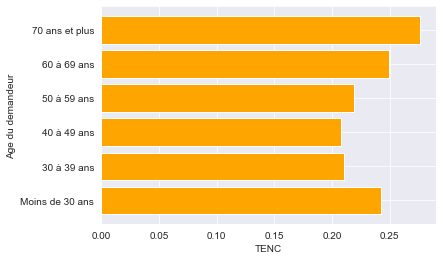

In [33]:
plt.barh(dfplotp["Age"], dfplotp['Taux d\'effort'], color="orange")
plt.xlabel("TENC")
plt.ylabel('Age du demandeur')

In [35]:
attentea=autres[[ "Age", "Taux d\'effort"]]
dfplota = attentea.groupby('Age').mean()
#dfplota['Temps attente'] = dfplota['TENC'].values.astype(np.int64)
dfplota['Taux d\'effort'] = dfplota['Taux d\'effort']
dfplota.reset_index(inplace=True)
fig = plt.figure(1, figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Age du demandeur')

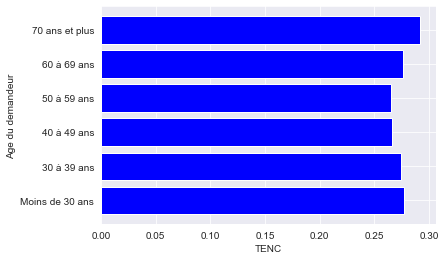

In [36]:
plt.barh(dfplota["Age"], dfplota['Taux d\'effort'], color="blue")
plt.xlabel("TENC")
plt.ylabel('Age du demandeur')

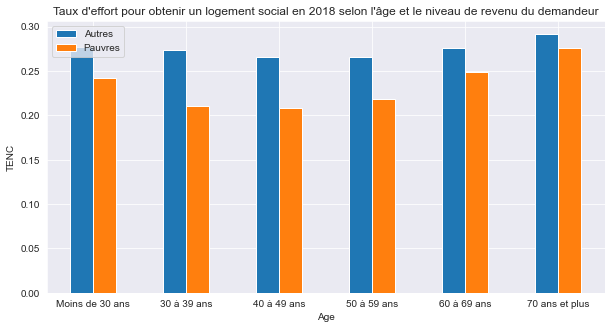

In [37]:
dfplotp['Key'] = 'Pauvres'
dfplota['Key'] = 'Autres'

DF = pd.concat([dfplotp,dfplota],keys=['Pauvres','Autres'])

DFGroup = DF.groupby(['Age','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar', ylabel='TENC', title='Taux d\'effort pour obtenir un logement social en 2018 selon l\'âge et le niveau de revenu du demandeur', figsize=(10,5), rot=0)
plt.legend(['Autres', 'Pauvres'], loc='upper left')

In [39]:
DFGPlot.figure.savefig('TENC.pdf')

### En fonction du type de logement attribué

In [38]:
attentep=pauvres[[ "Type du logement attribué", "Taux d\'effort"]]
dfplotp = attentep.groupby('Type du logement attribué').mean()
dfplotp['Taux d\'effort'] = dfplotp['Taux d\'effort']
dfplotp.reset_index(inplace=True)
attentea=autres[[ "Type du logement attribué", "Taux d\'effort"]]
dfplota = attentea.groupby('Type du logement attribué').mean()
#dfplota['Temps attente'] = dfplota['Temps attente'].values.astype(np.int64)
dfplota['Taux d\'effort'] = dfplota['Taux d\'effort']
dfplota.reset_index(inplace=True)

In [39]:
attentep=pauvres[[ "Type du logement attribué", "Taux d\'effort"]]
countp = attentep.groupby('Type du logement attribué').count()
countp

,Taux d'effort
Type du logement attribué,
T1,1289
T2,2089
T3,4201
T4,2670
T5,659
T6,62
T7,3


In [40]:
attentea=autres[[ "Type du logement attribué", "Taux d\'effort"]]
counta = attentea.groupby('Type du logement attribué').count()
counta

,Taux d'effort
Type du logement attribué,
T1,3161
T2,8591
T3,8251
T4,3530
T5,789
T6,47
T7,4


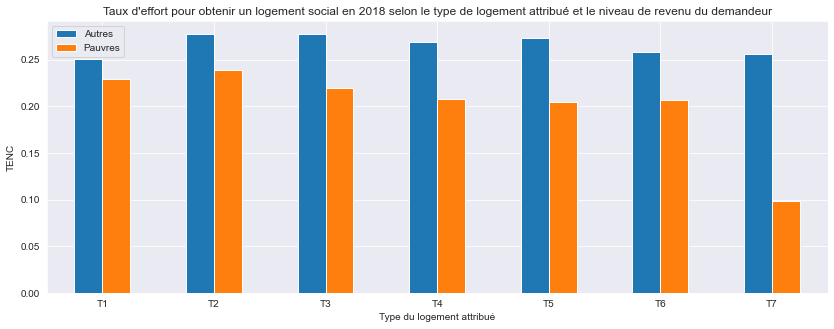

In [41]:
dfplotp['Key'] = 'Pauvres'
dfplota['Key'] = 'Autres'

DF = pd.concat([dfplotp,dfplota],keys=['Pauvres','Autres'])

DFGroup = DF.groupby(['Type du logement attribué','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar', ylabel='TENC', title='Taux d\'effort pour obtenir un logement social en 2018 selon le type de logement attribué et le niveau de revenu du demandeur', figsize=(14,5), rot=0)
plt.legend(['Autres', 'Pauvres'], loc='upper left')

In [52]:
DFGPlot.figure.savefig('TENC_Type logement attribué.pdf')

### En fonction du motif n°1 ayant motivé la demande

In [42]:
attentep=pauvres[[ "motif n°1 de la demande", "Taux d\'effort"]]
dfplotp = attentep.groupby('motif n°1 de la demande').mean()
#dfplotp['Temps attente'] = dfplotp['Temps attente'].values.astype(np.int64)
dfplotp.reset_index(inplace=True)
attentea=autres[[ "motif n°1 de la demande", "Taux d\'effort"]]
dfplota = attentea.groupby('motif n°1 de la demande').mean()
#dfplota['Temps attente'] = dfplota['Temps attente'].values.astype(np.int64)
dfplota.reset_index(inplace=True)

In [43]:
attentea=autres[[ "motif n°1 de la demande", "Taux d\'effort"]]
counta = attentea.groupby('motif n°1 de la demande').count()
counta

,Taux d'effort
motif n°1 de la demande,
Accédant à la propriété en difficulté,25
Assistant(e) maternel(le) ou familiale,32
Autre motif particulier (précisez),575
"Divorce, séparation",991
Décohabitation,936
Démolition,520
En procédure d'expulsion,261
"Futur mariage, concubinage, PACS",533
Handicap,468


In [44]:
attentep=pauvres[[ "motif n°1 de la demande", "Taux d\'effort"]]
countp = attentep.groupby('motif n°1 de la demande').count()
countp

,Taux d'effort
motif n°1 de la demande,
Accédant à la propriété en difficulté,7
Assistant(e) maternel(le) ou familiale,11
Autre motif particulier (précisez),194
"Divorce, séparation",310
Décohabitation,250
Démolition,398
En procédure d'expulsion,230
"Futur mariage, concubinage, PACS",46
Handicap,333


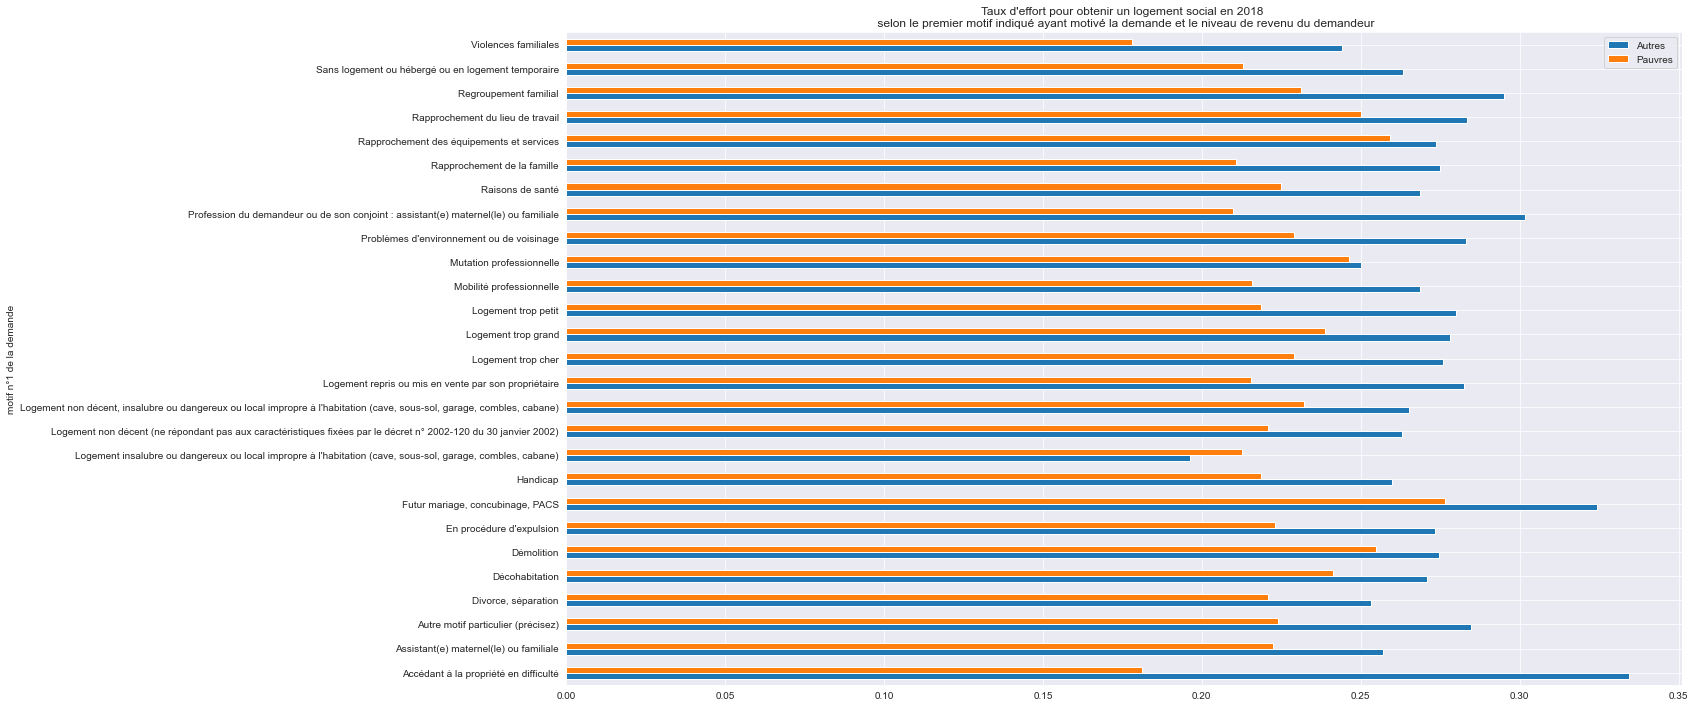

In [45]:
dfplotp['Key'] = 'Pauvres'
dfplota['Key'] = 'Autres'

DF = pd.concat([dfplotp,dfplota],keys=['Pauvres','Autres'])

DFGroup = DF.groupby(['motif n°1 de la demande','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='barh', ylabel='Taux d\'effort', title='Taux d\'effort pour obtenir un logement social en 2018 \n selon le premier motif indiqué ayant motivé la demande et le niveau de revenu du demandeur', figsize=(20,12))
plt.legend(['Autres', 'Pauvres'], loc='upper right')
DFGPlot.grid(True)

In [57]:
DFGPlot.figure.savefig('TENC_Motif.pdf', bbox_inches='tight')

### En fonction de la surface du logement attribué

In [47]:
df['Surface']=pd.cut(df['Surface du logement attribué'], [0, 30, 50, 70, 90, 110, 5000000], labels=['Moins de 30m2', 'Entre 30 et 50m2', 'Entre 50 et 70m2', 'Entre 70 et 90m2', 'Entre 90 et 110m2', 'Plus de 110m2'])

In [49]:
pauvres = df[df['Catégorie']== 'Pauvres']
autres = df[df['Catégorie']== 'Autres']
attentep=pauvres[[ "Surface", "Taux d\'effort"]]
dfplotp = attentep.groupby('Surface').mean()
dfplotp['Taux d\'effort'] = dfplotp['Taux d\'effort'].values.astype(np.int64)
dfplotp.reset_index(inplace=True)
attentea=autres[[ "Surface", "Taux d\'effort"]]
dfplota = attentea.groupby('Surface').mean()
dfplota['Taux d\'effort'] = dfplota['Taux d\'effort'].values.astype(np.int64)
dfplota.reset_index(inplace=True)

In [50]:
attentea=autres[[ "Surface", "Taux d\'effort"]]
counta = attentea.groupby('Surface').count()
counta

,Taux d'effort
Surface,
Moins de 30m2,1543
Entre 30 et 50m2,8259
Entre 50 et 70m2,9661
Entre 70 et 90m2,3994
Entre 90 et 110m2,799
Plus de 110m2,116


In [51]:
attentep=pauvres[[ "Surface", "Taux d\'effort"]]
countp = attentep.groupby('Surface').count()
countp

,Taux d'effort
Surface,
Moins de 30m2,787
Entre 30 et 50m2,2511
Entre 50 et 70m2,4532
Entre 70 et 90m2,2528
Entre 90 et 110m2,529
Plus de 110m2,84


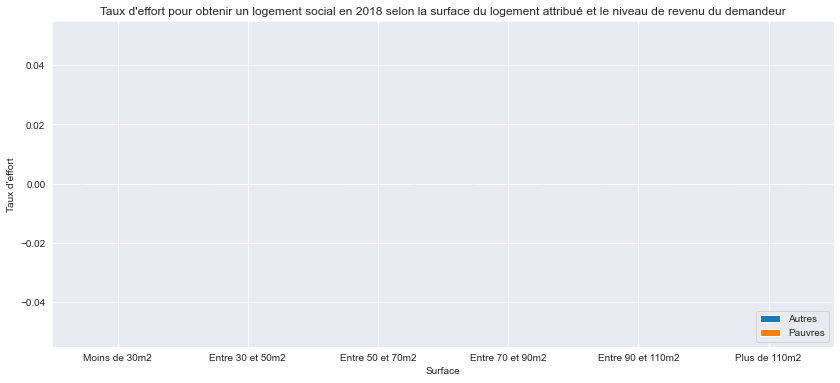

In [53]:
dfplotp['Key'] = 'Pauvres'
dfplota['Key'] = 'Autres'

DF = pd.concat([dfplotp,dfplota],keys=['Pauvres','Autres'])

DFGroup = DF.groupby(['Surface','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar', ylabel='Taux d\'effort', title='Taux d\'effort pour obtenir un logement social en 2018 selon la surface du logement attribué et le niveau de revenu du demandeur', figsize=(14,6), rot=0)
plt.legend(['Autres', 'Pauvres'], loc='lower right')

In [50]:
DFGPlot.figure.savefig('Temps d\'attente_Surface.pdf')

Il faudrait réarranger le graph au niveau de la lisibilité. On pourrait aussi créer une fonction qui donne le graph en fonction d'une colonne en entrée (motif, quintile, sexe, tranches d'âge,....). Il faudrait pour cela au préalable avoir un dataframe nettoyé. Trier aussi par ordre croissant les motifs avec la commande sort.

Sur les motifs on a l'impression que c'est pour les motfis relatifs à des mobilités professionnelles, ou liés à des violences conjugales que le temps est moins loin (pour les gens qui ont une certane stabilité professionnelle, ou pour les cas d'extrême urgence). Je ne comprends pas trop ce que fait le "assistante maternelle" dans la liste.

## Graphiques en fonction de la composition des ménages

### Général

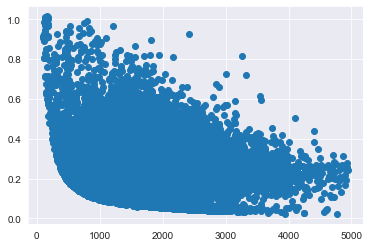

In [54]:
plt.scatter(df["Ri + PFS"], df["Taux d\'effort"])
plt.show()

### Personne isolée

In [55]:
Isolés=df[df['Composition foyer demandeur']=='Personne seule']
Isolés

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,région,Date création demande,Date de la radiation,Age demandeur,Situation familiale,...,TL,TP,Pp,APL,Taux d'effort,revenu_par_UC,Revenus annuels,Catégorie,Age,Surface
0,111031350487375056,2267,2267,0,2267,Provence-Alpes-Côte d'Azur,2013-03-19,2018-07-11,47,Célibataire,...,0.004053,0.032353,680.064544,0.0,0.291725,2267.0,27204.0,Autres,40 à 49 ans,Entre 30 et 50m2
1,175011216304700002,2906,2906,0,2906,Provence-Alpes-Côte d'Azur,2012-01-23,2018-03-31,30,Célibataire,...,0.004053,0.032353,903.296933,0.0,0.152904,2906.0,34872.0,Autres,30 à 39 ans,Entre 30 et 50m2
2,1110817739596GDPUB,1928,1928,0,1928,Alsace,2017-08-07,2018-01-11,25,Célibataire,...,0.004053,0.032353,563.595472,0.0,0.222687,1928.0,23136.0,Autres,Moins de 30 ans,Moins de 30m2
4,1110717722671GDPUB,2050,2050,0,2050,Provence-Alpes-Côte d'Azur,2017-07-13,2018-04-26,27,Célibataire,...,0.004053,0.032353,605.653748,0.0,0.303580,2050.0,24600.0,Autres,Moins de 30 ans,Moins de 30m2
5,1111117804808GDPUB,1676,1676,0,1676,Provence-Alpes-Côte d'Azur,2017-11-03,2018-02-14,29,Célibataire,...,0.003443,0.031743,467.930609,0.0,0.226337,1676.0,20112.0,Autres,Moins de 30 ans,Moins de 30m2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36125,111021758474475056,2671,2671,0,2671,Ile-de-France,2017-02-02,2018-04-25,26,Concubin (e),...,0.004053,0.032353,822.415632,0.0,0.220644,2671.0,32052.0,Autres,Moins de 30 ans,Moins de 30m2
36126,111071358583575056,1467,1467,0,1467,Ile-de-France,2013-07-11,2018-01-04,57,Célibataire,...,0.004053,0.032353,401.832872,0.0,0.348562,1467.0,17604.0,Autres,50 à 59 ans,Entre 30 et 50m2
36129,1110416328344GDPUB,1833,1833,0,1833,Ile-de-France,2016-04-16,2018-11-22,28,Célibataire,...,0.004053,0.032353,528.007700,0.0,0.255505,1833.0,21996.0,Autres,Moins de 30 ans,Entre 30 et 50m2
36130,111081513290693071,2030,2030,0,2030,Ile-de-France,2015-08-28,2018-08-22,36,Célibataire,...,0.004053,0.032353,599.183244,0.0,0.205586,2030.0,24360.0,Autres,30 à 39 ans,Entre 30 et 50m2


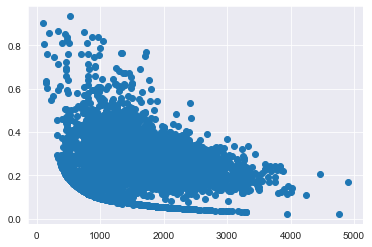

In [56]:
plt.scatter(Isolés["Ri + PFS"], Isolés["Taux d\'effort"])
plt.show()

### Couple

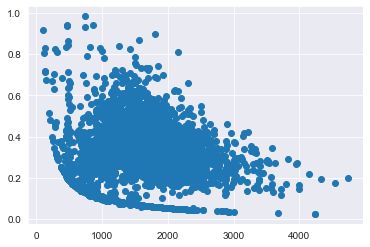

In [57]:
Couple=df[df['Composition foyer demandeur']=='Au moins 2 cotitulaires']
plt.scatter(Couple["Ri + PFS"], Couple["Taux d\'effort"])
plt.show()

### Couple avec une personne à charge

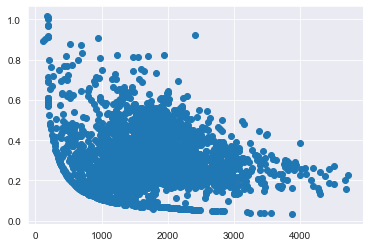

In [58]:
Couple1p=df[df['Composition foyer demandeur']=='Au moins 2 cotitulaires avec une personne à charge']
plt.scatter(Couple1p["Ri + PFS"], Couple1p["Taux d\'effort"])
plt.show()

### Seule avec une personne à charge

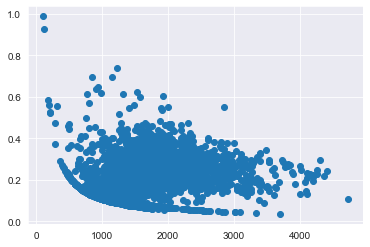

In [59]:
Seule1p=df[df['Composition foyer demandeur']=='Pers.seule avec 1 pers. à charge']
plt.scatter(Seule1p["Ri + PFS"], Seule1p["Taux d\'effort"])
plt.show()

### Couple avec deux personnes à charge

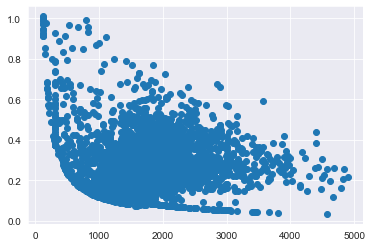

In [60]:
Couple2p=df[df['Composition foyer demandeur']=='Au moins 2 cotitulaires avec 2 personnes à charge']
plt.scatter(Couple2p["Ri + PFS"], Couple2p["Taux d\'effort"])
plt.show()

### Seule 2 personnes à charge

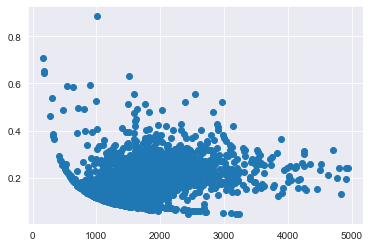

In [61]:
Seule2p=df[df['Composition foyer demandeur']=='Pers.seule avec 2 pers. à charge']
plt.scatter(Seule2p["Ri + PFS"], Seule2p["Taux d\'effort"])
plt.show()